# SVM
## Version 2
### Second approach to the SVM model, using the same data as the previous model, but with a different approach to the data.

In [662]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [663]:
train_clean = pd.read_csv('data/train_cleaned_v2.csv')
train_clean.drop(columns=['valid'], inplace=True)
test = pd.read_csv('data/testing_set.csv')

In [664]:
train_clean

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,5,2007-03-13,1.31811,1.32186,1.31547,1.31927,2003765.0,1
...,...,...,...,...,...,...,...,...
3503,3504,2018-05-18,1.18053,1.18221,1.17498,1.17689,220609.0,1
3504,3505,2018-05-20,1.17684,1.17756,1.17441,1.17474,18855.0,0
3505,3506,2018-05-21,1.17473,1.17973,1.17165,1.17913,227861.0,0
3506,3507,2018-05-22,1.17914,1.18296,1.17567,1.17824,255729.0,0


In [665]:
train_clean.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3.508000e+03,3508.000000
mean,1754.498860,1.292215,1.297639,1.287026,1.292213,2.788912e+05,0.499715
std,1012.818673,0.130691,0.131271,0.129932,0.130669,2.969235e+05,0.500071
min,0.000000,1.039040,1.041780,1.035230,1.039050,4.970000e+02,0.000000
25%,877.750000,1.181930,1.185345,1.177763,1.181907,8.133425e+04,0.000000
50%,1754.500000,1.312735,1.318680,1.307255,1.312840,1.922065e+05,0.000000
75%,2631.250000,1.376413,1.381210,1.371355,1.376515,2.743602e+05,1.000000
max,3508.000000,1.597490,1.603890,1.586430,1.597490,2.693602e+06,1.000000


In [666]:
train_clean.columns

Index(['train_idx', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'label'], dtype='object')

Ahora vamos a ver cómo hacer la normalización y la selección de características.

La normalización es una técnica que consiste en escalar los valores de las variables numéricas para que tengan un rango común, por ejemplo entre 0 y 1 o entre -1 y 1. Esto puede ayudar a mejorar el rendimiento de algunos algoritmos de aprendizaje automático, como SVM, que son sensibles a la escala de los datos.

Para hacer la normalización, podemos usar la clase MinMaxScaler de sklearn.preprocessing, que permite transformar los datos según la fórmula:

x_norm = (x - x_min) / (x_max - x_min)

Donde x es el valor original, x_min y x_max son los valores mínimo y máximo de la variable, y x_norm es el valor normalizado.

Para usar el MinMaxScaler, seguimos estos pasos:

Crear una instancia del MinMaxScaler con los parámetros que quieras, por ejemplo el rango al que quieres escalar los datos.
Ajustar el MinMaxScaler con los datos de entrenamiento usando el método .fit().
Transformar los datos de entrenamiento y de prueba usando el método .transform().

In [667]:
# Importar el MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Seleccionar las columnas que se quieren escalar de los DataFrames
train_to_scale = train_clean.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
test_to_scale = test.loc[:, ["Open", "High", "Low", "Close", "Volume"]]

# Aplicar el MinMaxScaler a las columnas seleccionadas
scaler = RobustScaler()
scaler.fit(train_to_scale)
train_scaled = scaler.transform(train_to_scale)
test_scaled = scaler.transform(test_to_scale)

# Convertir los arrays en DataFrames
train_scaled = pd.DataFrame(train_scaled, columns=train_to_scale.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_to_scale.columns)

# Seleccionar las columnas que no se quieren escalar de los DataFrames
train_not_scaled = train_clean.loc[:, ["train_idx", "Time", "label"]]
test_not_scaled = test.loc[:, ["test_idx", "Time"]]

# Concatenar los DataFrames por columnas
train_scaled = pd.concat([train_not_scaled, train_scaled], axis=1)
test_scaled = pd.concat([test_not_scaled, test_scaled], axis=1)

La variable de volume tiene una escala muy diferente al resto de las variables. Eso puede afectar al rendimiento del modelo SVM, ya que le daría más peso a esa variable que a las demás. Por eso es conveniente normalizar los datos para que todas las variables tengan la misma escala y el mismo impacto en el modelo.

La normalización es una de las formas más comunes de hacerlo, pero hay otras opciones. Por ejemplo, otra forma de normalización es la estandarización, que consiste en transformar los datos según la fórmula:

x_std = (x - x_mean) / x_std

Donde x es el valor original, x_mean y x_std son la media y la desviación estándar de la variable, y x_std es el valor estandarizado.

Esta transformación hace que los datos tengan una media de 0 y una desviación estándar de 1, lo que también ayuda a reducir el efecto de la escala en el modelo. Para hacer la estandarización, podemos usar la clase StandardScaler de sklearn.preprocessing, que funciona de forma similar al MinMaxScaler.

Otra opción que se puede probar es la normalización por norma L2, que consiste en dividir cada valor por la raíz cuadrada de la suma de los cuadrados de todos los valores de la variable. Esto hace que los datos tengan una norma L2 (o longitud) de 1, lo que también puede mejorar el rendimiento del modelo. Para hacer la normalización por norma L2, podemos usar la clase Normalizer de sklearn.preprocessing, que también funciona de forma similar al MinMaxScaler.

Consultar más información sobre estas y otras técnicas de normalización en la documentación de sklearn: https://scikit-learn.org/stable/modules/preprocessing.html



El mejor método de normalización puede depender de los datos y del modelo que se use. Sin embargo, una forma de elegir un método es probar varios y comparar sus resultados con la métrica F1-score.

En este caso, podemos empezar por el MinMaxScaler, ya que es el más sencillo de entender e implementar, y suele dar buenos resultados en muchos casos. Además, al escalar los datos entre 0 y 1, se evitan posibles problemas con valores negativos o muy grandes que puedan afectar al modelo.

Para otro método, podemos usar el StandardScaler, que también es muy popular y puede ser más adecuado si los datos tienen una distribución normal o si hay muchos valores atípicos. El StandardScaler también puede mejorar la estabilidad numérica del modelo al reducir la varianza de los datos.

El Normalizer puede ser una buena opción si los datos tienen una estructura geométrica o si se quiere preservar la distancia entre los puntos. El Normalizer también puede ayudar a reducir el efecto de la escala en el modelo al hacer que todos los puntos tengan la misma longitud.

En cualquier caso, es recomendable experimentar con diferentes métodos y parámetros y evaluar su impacto en el rendimiento del modelo. Así poder elegir el que mejor se adapte al problema.

In [668]:
# Mostrar la distribución de los datos con seaborn
#sns.pairplot(train_scaled)

In [669]:
# Calcular la matriz de correlación de los datos de entrenamiento, seleccionar solo las columnas numéricas
corr_matrix = train_scaled.loc[:,["Open", "High", "Low", "Close", "Volume"]].corr()

# Mostrar la matriz de correlación
corr_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999074,0.998981,0.998412,0.220687
High,0.999074,1.000000,0.998431,0.999100,0.227584
Low,0.998981,0.998431,1.000000,0.999037,0.213689
Close,0.998412,0.999100,0.999037,1.000000,0.221124
Volume,0.220687,0.227584,0.213689,0.221124,1.000000


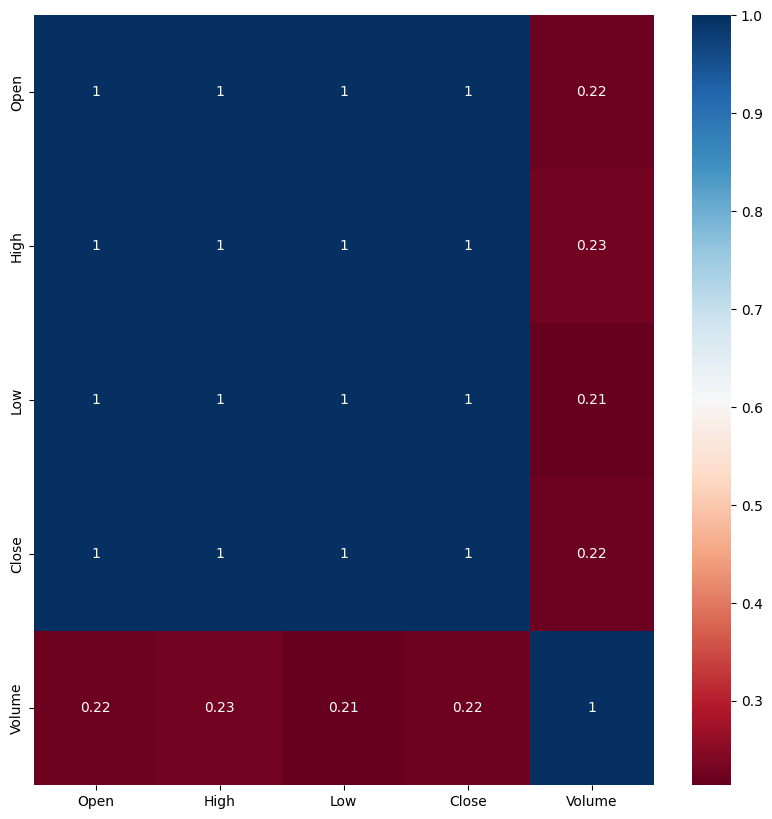

In [670]:
# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")
plt.show()

Las variables de open, close, high y low suelen estar muy relacionadas entre sí, ya que representan el precio del par de divisas EUR/USD en diferentes momentos del período de tiempo analizado.

Esto se refleja en los valores de correlación que obtienes, que son muy cercanos a 1 entre estas variables. Esto significa que hay una correlación positiva fuerte entre ellas, es decir, que cuando una sube, las otras también suelen subir, y viceversa.

Esto puede ser un problema para el modelo SVM, ya que puede provocar multicolinealidad, que es cuando hay una dependencia lineal entre las variables predictoras. Esto puede hacer que el modelo sea inestable, poco preciso y difícil de interpretar.

Para evitar este problema, podemos hacer dos cosas:

- Eliminar algunas de las variables que están altamente correlacionadas entre sí, y quedarte solo con una o dos que representen el precio del par de divisas. Por ejemplo, eliminar las variables de open, high y low, y dejar solo la variable de close, que es la que indica el precio final del período. Así reducimos la dimensionalidad de los datos y evitamos la redundancia de información.

- Crear una nueva variable que combine la información de las variables de open, high, low y close, y eliminar las originales. Por ejemplo, crear una variable llamada range, que sea la diferencia entre el precio más alto y el más bajo del período. Así capturamos la variabilidad del precio del par de divisas y reducirías la multicolinealidad.

Posríamos utilizar un método más avanzado para calcular la nueva variable, como PCA. PCA es una técnica de [extracción de características](https://vitalflux.com/feature-extraction-pca-python-example/) que genera nuevas características que son una combinación lineal de las características iniciales. PCA busca las direcciones de máxima varianza en los datos y proyecta los datos en un subespacio de menor dimensión1.

In [671]:
# Importar el PCA
from sklearn.decomposition import PCA

# Crear una instancia del PCA con el número de componentes que quieras
pca = PCA(n_components=3)

# Ajustar el PCA con los datos de entrenamiento
pca.fit(train_scaled[["Open", "High", "Low", "Close"]])

# Transformar los datos de entrenamiento y de prueba
train_pca = pca.transform(train_scaled[["Open", "High", "Low", "Close"]])
test_pca = pca.transform(test_scaled[["Open", "High", "Low", "Close"]])

In [672]:
# Convertir los arrays en DataFrames
train_pca = pd.DataFrame(train_pca, columns=["pca1", "pca2", "pca3"])
test_pca = pd.DataFrame(test_pca, columns=["pca1", "pca2", "pca3"])

In [673]:
# Eliminar las variables de open, high, low y close de los DataFrames
train_scaled = train_scaled.drop(["Open", "High", "Low", "Close"], axis=1)
test_scaled = test_scaled.drop(["Open", "High", "Low", "Close"], axis=1)

In [674]:
# Juntar los DataFrames de pca y train_scaled por columnas
train_scaled = pd.concat([train_scaled, train_pca], axis=1)

# Juntar los DataFrames de pca y test_scaled por columnas
test_scaled = pd.concat([test_scaled, test_pca], axis=1)

In [675]:
# Ver las primeras 5 filas del DataFrame train_scaled
train_scaled.head()

,train_idx,Time,label,Volume,pca1,pca2,pca3
0,0,2007-03-07,0,8.367632,0.229365,-0.018084,-0.003775
1,1,2007-03-08,1,9.344407,0.234382,0.001547,-0.018166
2,2,2007-03-09,1,8.635591,0.206909,0.002810,-0.016300
3,3,2007-03-11,1,0.000904,0.205242,-0.010640,-0.024614
4,5,2007-03-13,1,9.385049,0.271393,-0.011369,-0.012382


In [676]:
# Ver la información del DataFrame train_scaled
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   train_idx  3508 non-null   int64  
 1   Time       3508 non-null   object 
 2   label      3508 non-null   int64  
 3   Volume     3508 non-null   float64
 4   pca1       3508 non-null   float64
 5   pca2       3508 non-null   float64
 6   pca3       3508 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 192.0+ KB


In [677]:
train_scaled.describe()

,train_idx,label,Volume,pca1,pca2,pca3
count,3508.000000,3508.000000,3508.000000,3.508000e+03,3.508000e+03,3.508000e+03
mean,1754.498860,0.499715,0.449083,1.296315e-16,-1.341889e-17,-1.822943e-17
std,1012.818673,0.500071,1.538256,1.341823e+00,2.684773e-02,2.651194e-02
min,0.000000,0.000000,-0.993180,-2.601593e+00,-6.671632e-02,-4.154031e-02
25%,877.750000,0.000000,-0.574390,-1.140341e+00,-1.662410e-02,-1.568675e-02
50%,1754.500000,0.000000,0.000000,2.105122e-01,-7.262014e-03,-5.570489e-03
75%,2631.250000,1.000000,0.425610,8.592407e-01,1.018298e-02,8.488923e-03
max,3508.000000,1.000000,12.958853,3.095891e+00,1.954827e-01,3.593882e-01


In [678]:
test_scaled

,test_idx,Time,Volume,pca1,pca2,pca3
0,0,2018-05-29 00:00:00,0.745410,-1.382163,0.036333,-0.003848
1,1,2018-05-30 00:00:00,0.653873,-1.361522,-0.030026,0.042753
2,2,2018-05-31 00:00:00,0.484813,-1.276506,-0.011686,0.002031
3,3,2018-06-01 00:00:00,0.317711,-1.285481,0.012893,-0.003473
4,4,2018-06-03 00:00:00,-0.919065,-1.290403,-0.018145,-0.019067
...,...,...,...,...,...,...
1495,1495,2023-03-09 00:00:00,0.847034,-2.416948,-0.019902,0.002403
1496,1496,2023-03-10 00:00:00,1.922018,-2.358214,-0.005627,0.020675
1497,1497,2023-03-12 00:00:00,-0.598533,-2.299490,-0.009455,-0.017343
1498,1498,2023-03-13 00:00:00,2.843687,-2.284349,-0.009266,0.011268


In [679]:
test_scaled.columns, train_scaled.columns

(Index(['test_idx', 'Time', 'Volume', 'pca1', 'pca2', 'pca3'], dtype='object'),
 Index(['train_idx', 'Time', 'label', 'Volume', 'pca1', 'pca2', 'pca3'], dtype='object'))

In [680]:
# Importar la función train_test_split
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento en subconjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(train_scaled[["Volume", "pca1", "pca2", "pca3"]], train_scaled["label"], test_size=0.2, random_state=42, stratify=train_scaled["label"])

# Usar el conjunto de prueba solo para las características (X)
X_test = test_scaled[["Volume", "pca1", "pca2", "pca3"]]

In [681]:
# Importar el SVC
from sklearn.svm import SVC

# Crear una instancia del SVC con los parámetros que quieras
svc = SVC(kernel="sigmoid" ,C=0.4, coef0=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
svc.fit(X_train, y_train)

SVC(C=0.4, coef0=0.2, kernel='sigmoid', random_state=42)

In [682]:
# Evaluar el modelo con el subconjunto de validación
accuracy = svc.score(X_val, y_val)

# Mostrar la precisión del modelo
print(f"La precisión del modelo es {accuracy:.2f}")

La precisión del modelo es 0.54


In [683]:
# Importar la función f1_score
from sklearn.metrics import f1_score

# Calcular las etiquetas predichas por el modelo
y_pred = svc.predict(X_val)

# Calcular el F1-score del modelo
f1 = f1_score(y_val, y_pred, average="macro")

# Mostrar el F1-score del modelo
print(f"El F1-score del modelo es {f1:.2f}")

El F1-score del modelo es 0.54


### Try all parameters and select the best one

#### for sigmoid

In [684]:
results_sigmoid = pd.DataFrame(columns=["kernel", "C", "coef0", "accuracy", "f1"])

for i in range(0,10):
    for j in range(0,10):
        # Crear una instancia del SVC con los parámetros que quieras
        svc = SVC(kernel="sigmoid" ,C=j/10+0.1, coef0=i/10, random_state=42)

        # Entrenar el modelo con los datos de entrenamiento
        svc.fit(X_train, y_train)

        # Evaluar el modelo con el subconjunto de validación
        accuracy = svc.score(X_val[["Volume", "pca1", "pca2", "pca3"]], y_val)

        # Calcular las etiquetas predichas por el modelo
        y_pred = svc.predict(X_val[["Volume", "pca1", "pca2", "pca3"]])

        # Calcular el F1-score del modelo
        f1 = f1_score(y_val, y_pred, average="macro")
        
        # Almacenar los resultados en un DataFrame
        results_sigmoid.loc[len(results_sigmoid)] = ["sigmoid", j/10, i/10, accuracy, f1]

In [685]:
# plot the results of the grid search
px.scatter_3d(results_sigmoid, x="C", y="coef0", z="accuracy", color="f1", size="f1", hover_data=["kernel"])

In [686]:
results_sigmoid.sort_values(by="f1", ascending=False)

,kernel,C,coef0,accuracy,f1
24,sigmoid,0.4,0.2,0.538462,0.538458
23,sigmoid,0.3,0.2,0.537037,0.537029
21,sigmoid,0.1,0.2,0.537037,0.537029
26,sigmoid,0.6,0.2,0.535613,0.535613
25,sigmoid,0.5,0.2,0.535613,0.535613
...,...,...,...,...,...
17,sigmoid,0.7,0.1,0.458689,0.458672
31,sigmoid,0.1,0.3,0.458689,0.458619
15,sigmoid,0.5,0.1,0.457265,0.457237
14,sigmoid,0.4,0.1,0.457265,0.457237


#### for rbf

In [687]:
results_rbf = pd.DataFrame(columns=["kernel", "C", "gamma", "accuracy", "f1"])

for i in range(0,10):
    for j in range(0,10):
        # Crear una instancia del SVC con los parámetros que quieras
        svc = SVC(kernel="rbf" ,C=j/10+0.1, gamma=i/10, random_state=42)

        # Entrenar el modelo con los datos de entrenamiento
        svc.fit(X_train, y_train)

        # Evaluar el modelo con el subconjunto de validación
        accuracy = svc.score(X_val[["Volume", "pca1", "pca2", "pca3"]], y_val)

        # Calcular las etiquetas predichas por el modelo
        y_pred = svc.predict(X_val[["Volume", "pca1", "pca2", "pca3"]])

        # Calcular el F1-score del modelo
        f1 = f1_score(y_val, y_pred, average="macro")
        
        # Almacenar los resultados en un DataFrame
        results_rbf.loc[len(results_rbf)] = ["radial", j/10, i/10, accuracy, f1]

In [688]:
# plot the results of the grid search
px.scatter_3d(results_rbf, x="C", y="gamma", z="accuracy", color="f1", size="f1", hover_data=["kernel"])

In [689]:
results_rbf.sort_values(by="f1", ascending=False)

,kernel,C,gamma,accuracy,f1
23,radial,0.3,0.2,0.541311,0.539663
24,radial,0.4,0.2,0.541311,0.537466
28,radial,0.8,0.2,0.544160,0.535837
25,radial,0.5,0.2,0.541311,0.535577
27,radial,0.7,0.2,0.541311,0.534322
...,...,...,...,...,...
6,radial,0.6,0.0,0.500000,0.333333
1,radial,0.1,0.0,0.500000,0.333333
8,radial,0.8,0.0,0.500000,0.333333
9,radial,0.9,0.0,0.500000,0.333333


In [690]:
# 3d scatter plot de los datos de entrenamiento con plotly
import plotly.express as px
fig = px.scatter_3d(X_train, x="pca1", y="pca2", z="pca3", color=y_train)
fig.show()

In [691]:
# Hacer la predicción final con el subconjunto de prueba
y_test_pred = svc.predict(X_test)

In [692]:
# Crear un DataFrame con las predicciones
predictions = pd.DataFrame({"Id": test["test_idx"], "target": y_test_pred})

In [693]:
predictions.target.value_counts()

target
0    1111
1     389
Name: count, dtype: int64

In [694]:
# crear un json con la siguiente estructura
# {"target":
#   {
#     "0": 0,
#   },
#   {
#     "1": 0,
#   },
#   {
#     "n": k,
#   }
# }
# donde n es el índice del subconjunto de prueba y k es la predicción del modelo

import json

json_dict = {"target": {}}
for i in range(len(predictions)):
    json_dict["target"][str(i)] = int(predictions["target"][i])

# Convertir el diccionario a JSON
json_str = json.dumps(json_dict)

# Guardar el archivo json
with open("predictions.json", "w") as outfile:
    outfile.write(json_str)

Con esto habríamos terminado el reto, pero podemos sugerir algunas mejoras y otras cosas que podríamos hacer para mejorar el modelo. Algunas ideas son:

- Probar diferentes valores de los parámetros del SVC, como el kernel, el C o el gamma, y ver cómo afectan al rendimiento del modelo. Podemos usar la función GridSearchCV de sklearn.model_selection para hacer una búsqueda exhaustiva de los mejores parámetros.
- Probar diferentes métodos de selección o extracción de características, como la importancia de las variables, los métodos de filtrado o envoltura, o usar más componentes del PCA.
- Probar diferentes técnicas de normalización o escalado de los datos, como el StandardScaler, el RobustScaler o el Normalizer.
- Probar diferentes algoritmos de aprendizaje automático para la clasificación, como la regresión logística, el árbol de decisión, el kNN o el random forest.
- Añadir más variables o características al conjunto de datos, como datos históricos de tweets, noticias u otros indicadores económicos.